In [ ]:
################Programa Aprendizaje automatico#############
###Edison Aguilar C

In [169]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Nos ayudará a automatizar todo
from sklearn.model_selection import GridSearchCV # Nos ayudará a realizar cross-validation
#from sklearn.ensemble import RandomForestClassifier # Modelo de Random Forest
from sklearn.metrics import classification_report, accuracy_score # Métricas de precisión y performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix

# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [170]:
# importing the dataset
path = "C:\\PROGRAMAS PYTHON\\UIDE\\APRENDIZAJE AUTOMATICO\\penguins.csv"
data = pd.read_csv(path)
data.head()

species = data['species'].unique()
print("Estas son todas las especies:   ")
print(species)

Estas son todas las especies:   
['Adelie' 'Chinstrap' 'Gentoo']


In [171]:
#  describimos las variables 
data.describe()




,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [172]:
# revisamos el formato de cada columna y si tienen datos nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [173]:
print(data.columns)
print(data['species'].unique())
data.head()

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
['Adelie' 'Chinstrap' 'Gentoo']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [174]:
data_pngn = data.copy()
#Liempieza de Datos y ADA
data_pngn['species'].fillna('ERR', inplace=True)
data_pngn['island'].fillna('ERR', inplace=True)
data_pngn['bill_length_mm'].fillna('ERR', inplace=True)
data_pngn['bill_depth_mm'].fillna('ERR', inplace=True)
data_pngn['flipper_length_mm'].fillna('ERR', inplace=True)
data_pngn['body_mass_g'].fillna('ERR', inplace=True)
data_pngn['sex'].fillna('ERR', inplace=True)

data_pngn.head()

#data_pngn['Sex']=new_lter['Sex'].replace({'MALE':'male','FEMALE':'female'})#

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,ERR,ERR,ERR,ERR,ERR
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [175]:
print(data_pngn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    object
 1   island             344 non-null    object
 2   bill_length_mm     344 non-null    object
 3   bill_depth_mm      344 non-null    object
 4   flipper_length_mm  344 non-null    object
 5   body_mass_g        344 non-null    object
 6   sex                344 non-null    object
dtypes: object(7)
memory usage: 18.9+ KB
None


In [176]:
#Observing Categorical Values
print('1', data_pngn['species'].unique())
print('2',data_pngn['island'].unique())
print('3', data_pngn['bill_length_mm'].unique())
print('4',data_pngn['flipper_length_mm'].unique())
print('5',data_pngn['body_mass_g'].unique())
print('6',data_pngn['flipper_length_mm'].unique())
print('7',data_pngn['sex'].unique())


data_pngn['species'].fillna('ERR', inplace=True)
data_pngn['island'].fillna('ERR', inplace=True)
data_pngn['bill_length_mm'].fillna('ERR', inplace=True)
data_pngn['bill_depth_mm'].fillna('ERR', inplace=True)
data_pngn['flipper_length_mm'].fillna('ERR', inplace=True)
data_pngn['body_mass_g'].fillna('ERR', inplace=True)
data_pngn['sex'].fillna('ERR', inplace=True)



1 ['Adelie' 'Chinstrap' 'Gentoo']
2 ['Torgersen' 'Biscoe' 'Dream']
3 [39.1 39.5 40.3 'ERR' 36.7 39.3 38.9 39.2 34.1 42.0 37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.0 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.0 44.1 37.0 39.6 37.5 42.3 40.1
 35.0 34.5 41.4 39.0 35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.0 38.1 33.1 43.2 41.0 45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.0 51.3 45.4 52.7
 45.2 46.1 46.6 51.7 47.0 52.0 45.9 50.5 50.3 58.0 46.4 49.2 42.4 48.5
 50.6 46.7 49.5 52.8 54.2 51.0 49.7 47.5 47.6 46.9 53.5 49.0 46.2 50.9
 45.5 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8
 55.8 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1
 42.6 44.4 44.0 45.3 43.6 44.9 45.0 43.8 50.4 54.3 47.7 48.6 51.1 52.5
 47.4 43.4 52.1 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
4 [181.0 186.0 195.0 'ERR' 193.0 190.0 180.0 182.0 191.0 198.0 185.0 197.0
 184.0 194.0 174.

Text(0, 0.5, 'Conteo')

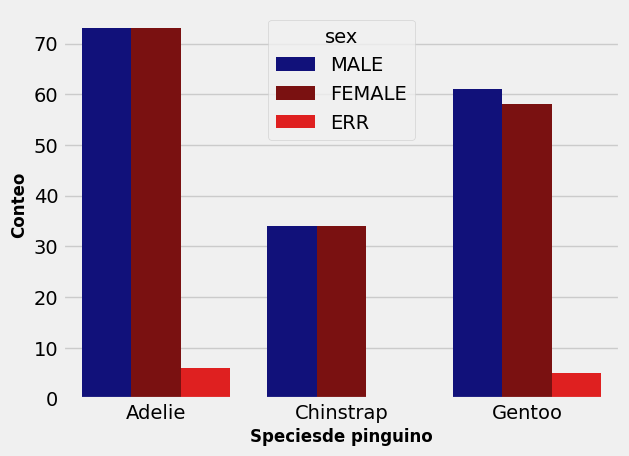

In [177]:
#EDA....
fig, ax=plt.subplots()

sns.countplot(data=data_pngn, x='species', hue='sex', palette=['darkblue','darkred','red'])
#Labels
plt.xlabel('Speciesde pinguino', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Conteo', fontsize=12, fontweight='bold', color='k')
#plt('grafica1.png')
#en este caso graficamos sin eliminar los datos previos para analizar que porcentaje o cantidad de datos compromete la eliminacion de los q he seteado como error ->ERR
#Identificado la informacion presente en el dataset, elimino los valores que hje identificado como ERR ( excluyendolos de nuestro analisis de modelo)



In [178]:
data_pngn = data_pngn.loc[(data_pngn != "ERR").all(axis=1), :]
data_pngn.head()

#asginamos una nueva columna en relacion a la informacion a tratar , como 1 y 0 para los casos de male y female
data_pngn['sex2'] = data_pngn.iloc[:,6].apply(lambda x: "1" if x=='MALE' else "0")


Text(0, 0.5, 'Conteo')

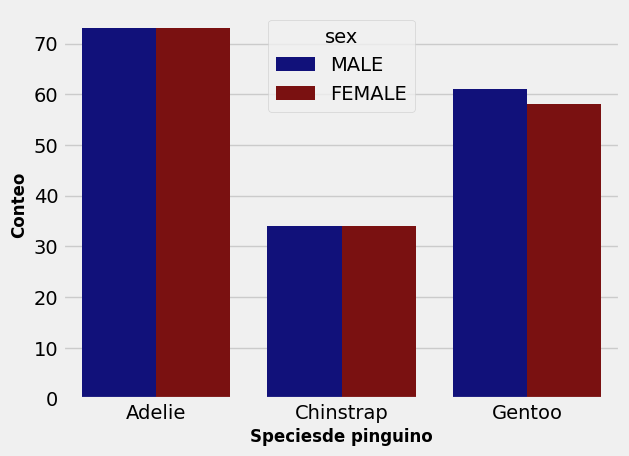

In [179]:
#EDA....
fig, ax=plt.subplots()

sns.countplot(data=data_pngn, x='species', hue='sex', palette=['darkblue','darkred','red'])
#Labels
plt.xlabel('Speciesde pinguino', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Conteo', fontsize=12, fontweight='bold', color='k')

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

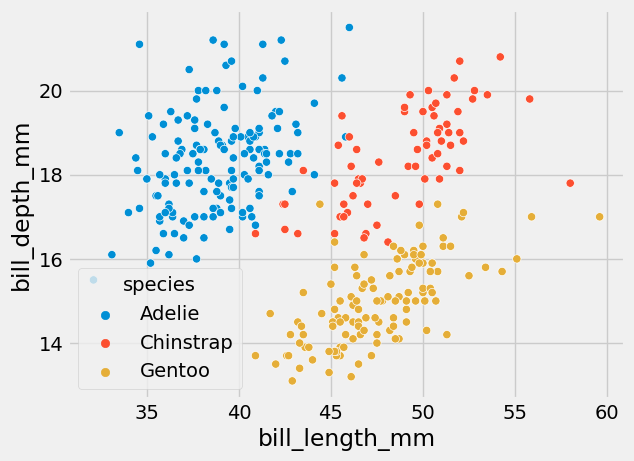

In [180]:
sns.scatterplot( x = "bill_length_mm",y = "bill_depth_mm", data = data_pngn, hue = "species")

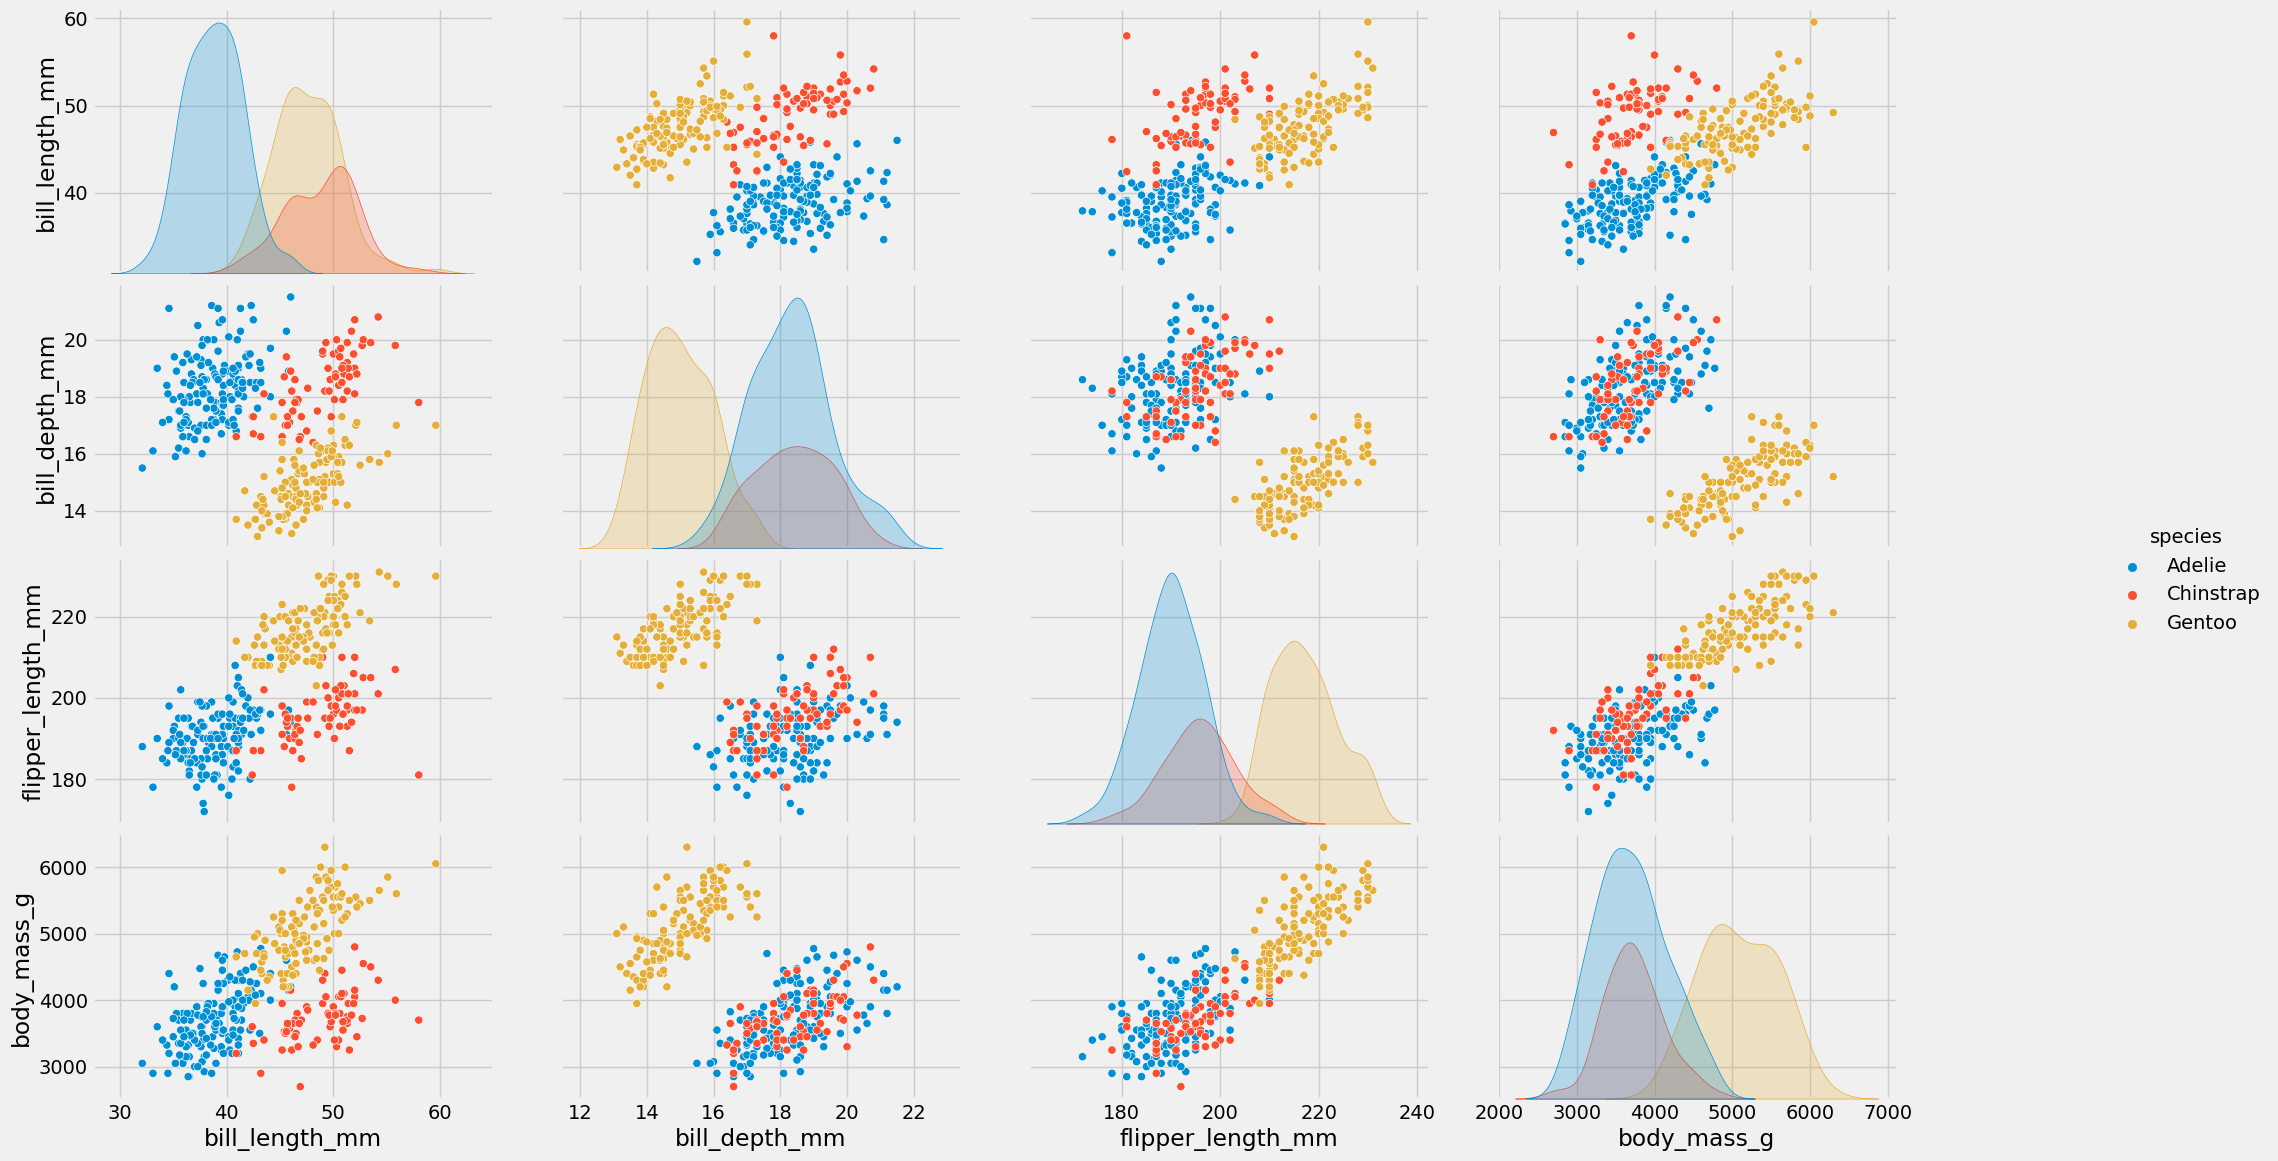

In [181]:
#data_pngn.rename(index={0:'INDEX'},inplace=True)
#data_pngn.columns
pairplot_figure = sns.pairplot(data_pngn, hue="species")
pairplot_figure.fig.set_size_inches(24, 12)

[[52  0  0]
 [ 1 19  0]
 [ 0  0 38]]


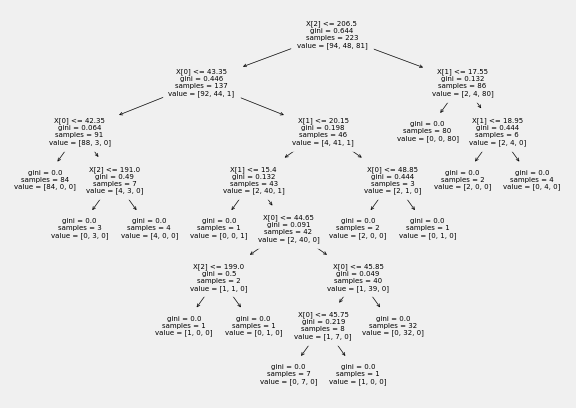

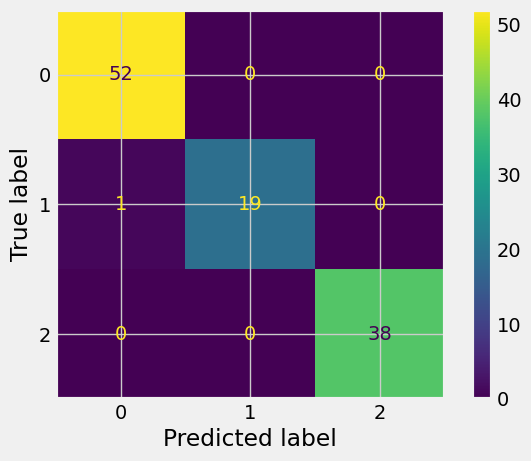

In [182]:
#utilizare las columnas index , y excluire la columna 1, que contiene la informacion para determinar la especie para mi modelo
X = data_pngn.iloc[:, 2:5]
#print("SE TIENE de X:", X)
Y=data_pngn['species'] #utilizamos la columna adicional RESPUESTA ya que deseamos que se base en si es de cada especie

#print(X.shape)#verifico que los dimensionamientos de los array esten correctos para poder avanzar  en ambos campos
#print("Se tiene de Y:",Y.shape)
#X = X.astype(float)

X.head()
Y.head()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier() #empezamos a generar nuestro arbol de decision con toda la informacion que se ha trabajado
clf = clf.fit(X_train, y_train)
clf.get_params()

predictions = clf.predict(X_test)
predictions #obtengo el array de las predicciones para visualizar que este todo correcto
y_pred = clf.predict(X_test)
#y_true = clf.predict(X_train)
#fianlmente grafico el arbol de decision 
tree.plot_tree(clf,fontsize=5)

accuracy_score(y_test, predictions)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()